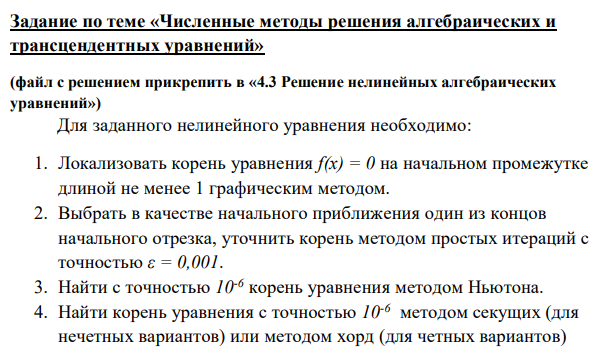
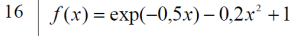

Из пункта 1 было получено: x ∈ [2;3] => можно использовать при расчетах

Для решения пункта 2 необходимо задать константные параметры:

In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

E = 0.001
x = sp.symbols('x')

f = lambda x: math.e ** (-.5 * x) - .2 * (x ** 2) + 1
f_derivative = sp.diff(math.e ** (-.5 * x) - .2 * (x ** 2) + 1, x) # первая производная - f'(x)
print(f"f'(x)={f_derivative}")

f'(x)=-0.4*x - 0.5/2.71828182845905**(0.5*x)


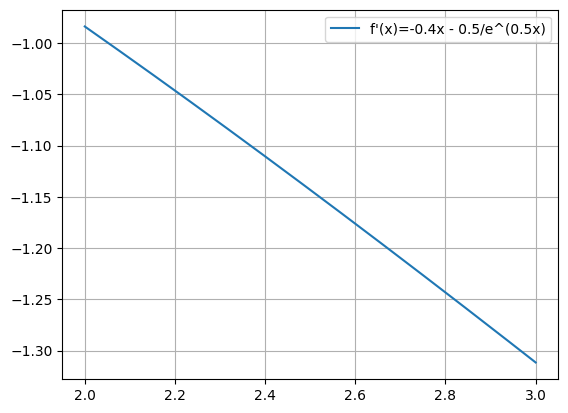

In [5]:
f_d = lambda x: -0.4 * x - (0.5 / (math.e ** (0.5 * x)))

# ==== Строим график f'(x), чтобы графически оценить max|f'(x)| на промежутке x ∈ [2;3] ====
array_x = np.linspace(2, 3, 1000)
y = [f_d(x_i) for x_i in array_x]

plt.plot(array_x, y, label="f'(x)=-0.4x - 0.5/e^(0.5x)")
plt.legend()
plt.grid(True)
plt.show()

Исходя из полученного графика выше можно сделать вывод, что max|f'(x)| на промежутке x ∈ [2;3] будет в точке x=3 (смотрим по графику, т.к. графический метод)

In [8]:
Q = abs(f_d(3))
print(f"f'(x) в точке x=3: {abs(f_d(3))}")

f'(x) в точке x=3: 1.3115650800742151


Теперь необходимо найти функцию fi(x) и параметр k:

In [10]:
k = math.floor(-(Q / 2)) # берем со знаком "-", т.к. функция на промежутке x ∈ [2;3] убывает
fi = lambda x: x - (f(x) / k)

print(f'fi(x) = x - (f(x) / k)\nk = {k}')

fi(x) = x - (f(x) / k)
k = -1


Далее находим q, который равен max|fi'(x)| на промежутке x ∈ [2;3] (ВАЖНО: q < 1, для выполнения условия сходимости)

In [11]:
fi_derivative = sp.diff(x + math.e ** (-.5 * x) - .2 * (x ** 2) + 1, x) # первая производная - fi'(x)
print(f"fi'(x) = {fi_derivative}")

fi'(x) = -0.4*x + 1 - 0.5/2.71828182845905**(0.5*x)


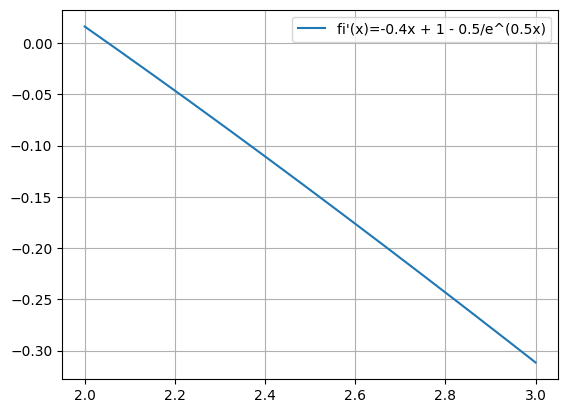

In [13]:
fi_d = lambda x: -0.4 * x + 1 - (0.5 / (math.e ** (0.5 * x)))

# ==== Строим график fi'(x) и ищем q ====
array_x_2 = np.linspace(2, 3, 1000)
y_2 = [fi_d(x_i) for x_i in array_x_2]

plt.plot(array_x_2, y_2, label="fi'(x)=-0.4x + 1 - 0.5/e^(0.5x)")
plt.legend()
plt.grid(True)
plt.show()

Исходя из полученного графика выше можно сделать вывод, что max|f'(x)| на промежутке x ∈ [2;3] будет в точке x=3 (смотрим по графику, т.к. графический метод)

In [15]:
q = abs(fi_d(3))

if q < 1:
    print(f"fi'(x) в точке x=3: {abs(fi_d(3))}")
else:
    print('Значение q противоречит условию сходимости')

fi'(x) в точке x=3: 0.31156508007421513


Исходя из условий берем один из концов отрезка x0 = 3 и находим корень уровнения итерационными вычислениями пока не будет выполнено условие:
|xn - xn-1| <= (q / (1 - q)) * E

In [29]:
# ==== Найдем (q / (1 - q)) * E ====
# пусть Lim = (q / (1 - q)) * E

Lim = round((q / (1 - q)) * E, 4)
x = 3
max_iter = 100

for i in range(max_iter):
    x_next = fi(x)
    if abs(x_next - x) < Lim:
        print(f"Решение найдено: x ≈ {round(x_next, 4)}\nИтераций: {i+1}")
        break
    x = x_next

Решение найдено: x ≈ 2.5317
Итераций: 5


Дальнейшее решение находится в файле newton_method.ipynb